## Plot results for Kim tree

Mamie Wang 2020/10/14

Test run time and accuracy against the length of sequences for Kim tree of size 2048. 

Scripts: `sbatch --array = `
List of experiments: `../test_catepillar_tree.lst`

In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
def summarize_perf(paths, agg = ["mean", "std"], sort_values = [('RF', 'mean'), ("runtime", "mean")], ascend = [True, True]):
    df = pd.DataFrame()
    for path in paths:
        perf_metrics = pd.read_csv(path)
        perf_metrics = perf_metrics.loc[:, ["method", "threshold", "runtime", "RF", "F1"]]
        has_threshold = (perf_metrics.threshold != 0) & (perf_metrics.threshold != "None")
        perf_metrics.loc[has_threshold,'method'] = perf_metrics.loc[has_threshold,'method'] + " (" + perf_metrics.loc[has_threshold,'threshold'].astype(float).astype(int).astype(str) + ")"
        perf_metrics = perf_metrics.loc[:, ["method", "runtime", "RF", "F1"]]
        df = df.append(perf_metrics)
    perf_summarized = df.groupby("method").agg(agg).round(2).sort_values(sort_values, ascending=ascend)
    return df, perf_summarized

In [3]:
# results

res_csv = glob.glob("/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/experiments/results/kim_*")

In [4]:
metrics, summarized = summarize_perf(res_csv)
summarized

/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)
/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


runtime               RF              F1      
                    mean     std     mean      std   mean   std
method                                                         
STR+SNJ (32)        3.20    4.16   151.00     1.41  70.28  0.28
STR+NJ (32)         0.21    0.04   154.00     5.66  69.69  1.11
RaXML            2503.40  159.33   386.40    32.69  95.28  0.40
NJ               1339.67  916.31   657.43   389.09  87.17  5.47
SNJ              1045.26  712.56  1444.29   909.43  76.35  1.30
STR+RaXML (256)  1400.12   67.51  1700.00   331.42  79.24  4.05
STR+NJ (64)       338.18  231.54  1788.57  1157.68  72.83  5.35
STR+NJ (256)      470.66   28.69  1868.00   262.74  77.19  3.21
STR+SNJ (64)      246.66  169.10  1951.71  1234.47  68.41  2.00
STR+RaXML (128)  1066.89   67.03  1962.80   179.24  76.03  2.19
STR+NJ (128)      457.72   15.63  2198.80   115.68  73.15  1.41
STR+SNJ (256)     443.28   28.07  2205.60   143.51  73.06  1.75
STR+RaXML (64)    911.15   50.03  2281.20   220.14  72.14  2.69
STR+SNJ (128)     348.74   35.15  2330.80   211.89  71.53  2.59

In [6]:
import sys, os

sys.path.append("/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree")

import generation
import reconstruct_tree
import time
import utils
import pandas as pd
import argparse
import dendropy

# Find suitable parameters for caterpillar trees

tree = dendropy.Tree.get(path="/gpfs/ysm/project/kleinstein/mw957/data/processed/STDR/steps-2048_0.nex", schema="nexus")

In [7]:
m = 800
mutation_rate = 0.01
kappa = 2
observations, taxa_meta = generation.simulate_sequences(m, tree_model=tree, seq_model=generation.HKY(kappa = kappa), 
                                                        mutation_rate=mutation_rate, alphabet="DNA")

In [8]:
threshold = 512
spectral_method = reconstruct_tree.SpectralTreeReconstruction(reconstruct_tree.NeighborJoining, reconstruct_tree.HKY_similarity_matrix)
start_time = time.time()
tree_rec = spectral_method.deep_spectral_tree_reconstruction(observations, reconstruct_tree.HKY_similarity_matrix,
                                                            taxa_metadata = taxa_meta,
                                                            threshhold = threshold, min_split = 5, verbose = False)
runtime = time.time() - start_time
RF,F1 = reconstruct_tree.compare_trees(tree_rec, tree)

/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree/reconstruct_tree.py:448: RuntimeWarning: invalid value encountered in true_divide
  O_AB_n = O_AB/np.linalg.norm(O_AB)
/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree/reconstruct_tree.py:448: RuntimeWarning: invalid value encountered in true_divide
  O_AB_n = O_AB/np.linalg.norm(O_AB)


In [9]:
if threshold is not None: print(threshold)
print("--- %s seconds ---" % runtime)
print("RF = ",RF)
print("F1% = ",F1)

512
--- 873.6613349914551 seconds ---
RF =  3066
F1% =  62.554958475818275


In [10]:
m = 800
mutation_rate = 0.005
kappa = 2
observations, taxa_meta = generation.simulate_sequences(m, tree_model=tree, seq_model=generation.HKY(kappa = kappa), 
                                                        mutation_rate=mutation_rate, alphabet="DNA")

In [11]:
threshold = 512
spectral_method = reconstruct_tree.SpectralTreeReconstruction(reconstruct_tree.NeighborJoining, reconstruct_tree.HKY_similarity_matrix)
start_time = time.time()
tree_rec = spectral_method.deep_spectral_tree_reconstruction(observations, reconstruct_tree.HKY_similarity_matrix,
                                                            taxa_metadata = taxa_meta,
                                                            threshhold = threshold, min_split = 5, verbose = False)
runtime = time.time() - start_time
RF,F1 = reconstruct_tree.compare_trees(tree_rec, tree)

/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree/reconstruct_tree.py:448: RuntimeWarning: invalid value encountered in true_divide
  O_AB_n = O_AB/np.linalg.norm(O_AB)
/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree/reconstruct_tree.py:448: RuntimeWarning: invalid value encountered in true_divide
  O_AB_n = O_AB/np.linalg.norm(O_AB)


In [12]:
if threshold is not None: print(threshold)
print("--- %s seconds ---" % runtime)
print("RF = ",RF)
print("F1% = ",F1)

512
--- 851.5892326831818 seconds ---
RF =  1504
F1% =  81.63165608207132


In [6]:
# write out list of parameters to run
import numpy as np

m = [400, 600, 800, 1000, 1200]
tree_type = "path"
method = ["NJ", "SNJ", "RAxML", 
          "STDR+NJ", "STDR+NJ", "STDR+NJ", 
          "STDR+SNJ", "STDR+SNJ", "STDR+SNJ", 
          "STDR+RAxML", "STDR+RAxML", "STDR+RAxML"]
path = "/gpfs/ysm/project/kleinstein/mw957/data/processed/STDR/steps-2048_0.nex"
nrun = 5
size = 512
threshold = [0] * 15 + list(np.repeat([256, 128, 64] * 3, 5))
kappa = 2
mutation_rate = 0.005
verbose = True
m_lst = np.tile(m, len(method))

In [7]:
par_list = pd.DataFrame({"type": tree_type, "method": np.repeat(method, len(m)), 
              "nrun": nrun, "size": size, "path": path, "threshold": threshold,  
              "m": m_lst, "kappa": kappa, "mutation_rate": mutation_rate, "verbose": verbose})

In [9]:
par_list.to_csv("/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/experiments/test_kim_tree.lst", 
                sep = "\t",  index = False)

## Read in the results

In [1]:
def summarize_perf(paths, agg = ["mean", "std"], sort_values = ["m", ('RF', 'mean'), ("runtime", "mean")], ascend = [True, True, True]):
    df = pd.DataFrame()
    for path in paths:
        perf_metrics = pd.read_csv(path)
        m = re.search('_m([0-9]+)', path).group(1)
        perf_metrics = perf_metrics.loc[:, ["method", "threshold", "runtime", "RF", "F1"]]
        perf_metrics.loc[:,"m"] = int(m)
        has_threshold = (perf_metrics.threshold != 0) & (perf_metrics.threshold != "None")
        perf_metrics.loc[has_threshold,'method'] = perf_metrics.loc[has_threshold,'method'] + " (" + perf_metrics.loc[has_threshold,'threshold'].astype(float).astype(int).astype(str) + ")"
        perf_metrics = perf_metrics.loc[:, ["method", "m", "runtime", "RF", "F1"]]
        
        df = df.append(perf_metrics)
    perf_summarized = df.groupby(["m", "method"]).agg(agg).round(2).sort_values(sort_values, ascending=ascend)
    return df, perf_summarized

In [2]:
import glob
import pandas as pd
import re
from matplotlib import cm

paths = glob.glob("/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/experiments/results/kim2048_m*")

In [3]:
metrics, summarized = summarize_perf(paths)
summarized

/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


runtime               RF             F1      
                          mean      std    mean     std   mean   std
m    method                                                         
400  RAxML             4062.80   726.90   859.2   27.00  89.51  0.33
     STDR+RAxML (256)  1075.64    40.21  1790.8  146.03  78.13  1.78
     SNJ               1760.91    23.21  1840.4   43.16  77.52  0.53
     STDR+RAxML (128)   890.84    14.63  2066.0  107.51  74.77  1.31
     STDR+NJ (256)      481.66    13.41  2094.0   47.62  74.43  0.58
     STDR+RAxML (64)    751.49    14.86  2252.8   70.12  72.49  0.86
     STDR+NJ (128)      489.20     3.09  2340.8   74.48  71.41  0.91
     STDR+SNJ (256)     481.66    12.15  2449.2  141.85  70.09  1.73
     STDR+NJ (64)       440.28     8.06  2511.6  120.24  69.33  1.47
     STDR+SNJ (128)     449.68    10.52  2587.6   69.07  68.40  0.84
     STDR+SNJ (64)      427.61     5.96  2735.2   73.30  66.60  0.90
     NJ                1912.46    48.68  2888.8  100.35  64.72  1.23
600  RAxML             5311.14  1311.65   725.2   41.92  91.14  0.51
     STDR+RAxML (256)  1358.48    27.81  1548.4  127.72  81.09  1.56
     SNJ               1715.49    22.00  1637.2   54.80  80.00  0.67
     STDR+RAxML (128)  1099.78    10.98  1841.6  117.36  77.51  1.43
     STDR+NJ (256)      508.78     4.96  1876.4   90.65  77.08  1.11
     STDR+RAxML (64)    931.41    11.05  2049.2  118.01  74.97  1.44
     STDR+NJ (128)      426.23    11.04  2061.6  157.79  74.82  1.93
     STDR+SNJ (256)     440.99     8.62  2127.2   71.52  74.02  0.87
     STDR+NJ (64)       443.18    26.75  2161.6   45.13  73.60  0.55
     STDR+SNJ (128)     440.51     8.25  2306.0   76.52  71.84  0.93
     STDR+SNJ (64)      461.42     9.42  2475.6   72.55  69.77  0.89
     NJ                1939.48    35.68  2678.8   25.40  67.28  0.31
800  RAxML             6087.01  1049.73   568.4   64.16  93.06  0.78
     STDR+RAxML (256)  1615.50    29.62  1336.8  101.95  83.67  1.25
     SNJ               1808.55    41.06  1534.8   27.52  81.26  0.34
     STDR+RAxML (128)  1341.01    23.99  1622.0   85.76  80.19  1.05
     STDR+NJ (256)      439.38     6.80  1672.0   90.96  79.58  1.11
     STDR+RAxML (64)   1011.62    27.59  1895.2   69.71  76.85  0.85
     STDR+NJ (128)      444.59     9.07  1900.4  111.66  76.79  1.36
     STDR+SNJ (256)     480.15    13.85  1933.6   69.46  76.38  0.85
     STDR+NJ (64)       474.47    14.65  1977.2   52.55  75.85  0.64
     STDR+SNJ (128)     452.64    11.88  2084.4   96.68  74.54  1.18
     STDR+SNJ (64)      444.29     8.39  2330.4   89.97  71.54  1.10
     NJ                1893.80    32.14  2599.6   26.70  68.25  0.33
1000 RAxML             7509.29   890.26   492.0   53.59  93.99  0.65
     STDR+RAxML (256)  1967.08    31.19  1153.6  113.42  85.91  1.39
     SNJ               1735.58    42.45  1393.2   28.16  82.98  0.34
     STDR+NJ (256)      427.12     3.96  1537.6   54.32  81.22  0.66
     STDR+RAxML (128)  1517.18    24.07  1612.4   90.49  80.31  1.11
     STDR+NJ (128)      520.29    24.86  1765.2   86.19  78.44  1.05
     STDR+SNJ (256)     484.83    19.36  1830.4  118.76  77.65  1.45
     STDR+NJ (64)       455.56     8.36  1836.0   81.99  77.58  1.00
     STDR+RAxML (64)   1136.84    22.07  1863.2   47.62  77.24  0.58
     STDR+SNJ (128)     482.41    23.09  1974.0  101.91  75.89  1.24
     STDR+SNJ (64)      477.60    15.75  2157.6   57.35  73.65  0.70
     NJ                1844.65    22.92  2524.8   31.64  69.16  0.39
1200 RAxML             8879.08   777.37   477.6   22.33  94.17  0.27
     STDR+RAxML (256)  2210.07    19.00  1155.2  113.02  85.89  1.38
     SNJ               1771.41    35.95  1349.6   34.65  83.52  0.42
     STDR+RAxML (128)  1741.58    42.05  1396.4  101.74  82.95  1.24
     STDR+NJ (256)      447.94     7.55  1460.0   66.06  82.17  0.81
     STDR+SNJ (256)     530.72    16.61  1640.8   41.82  79.96  0.51
     STDR+NJ (128)      534.05    34.55  1656.0   77.45  79.78  0.95
     STDR+RAxML (64) 

In [4]:
df_long = pd.melt(metrics, id_vars = ["method", "m"], var_name = "performance").sort_values(["method", "performance"])

ordering = ["RAxML", "STDR+RAxML (256)", "STDR+RAxML (128)", "STDR+RAxML (64)", 
            "NJ", "STDR+NJ (256)", "STDR+NJ (128)", "STDR+NJ (64)", 
            "SNJ", "STDR+SNJ (256)", "STDR+SNJ (128)", "STDR+SNJ (64)"]
cmap = cm.get_cmap("tab20c", 20)
colors = [cmap(i) for i in range(12)]
color_dict = dict(zip(ordering, colors))

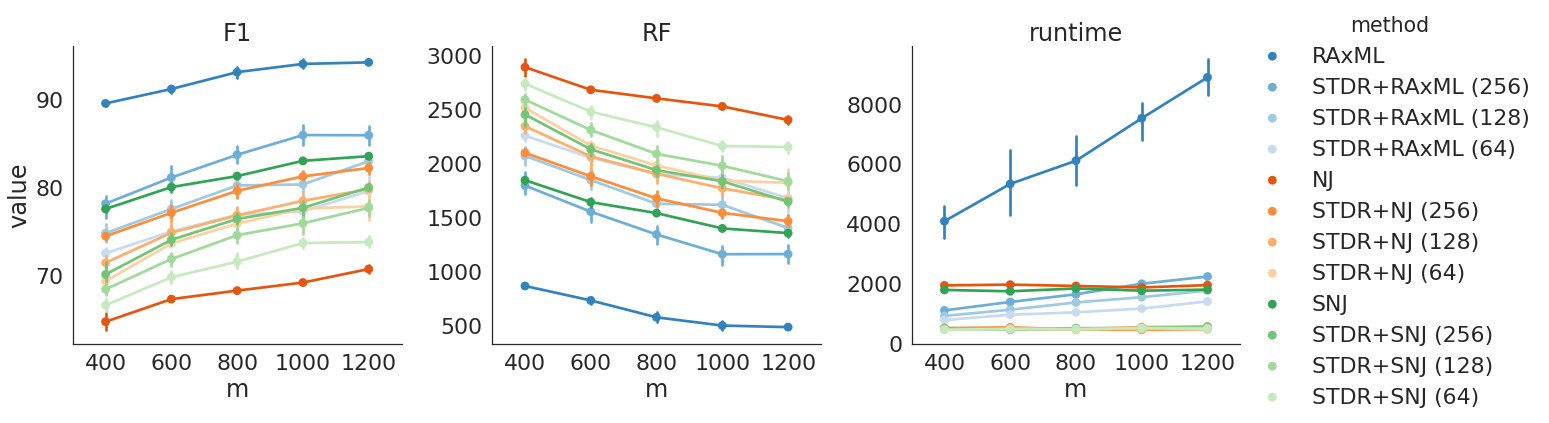

In [6]:
import seaborn as sns

sns.set(style = "white", font_scale = 2)
sns.catplot(data = df_long, x = "m", y = "value", hue = "method", hue_order = ordering,
           col = "performance", legend = True, kind = "point", sharey = False, height = 6, palette = color_dict).set_titles("{col_name}")